# Execution Probability - Part 1 - Quantities

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from orderFeatures import orderFeatures as sep20_pure_quantities
from ord_171101 import orderFeatures as nov01_pure_quantities
from ord_171102 import orderFeatures as nov02_pure_quantities
from ord_171103 import orderFeatures as nov03_pure_quantities

orders = [sep20_pure_quantities,
         nov01_pure_quantities,
         nov02_pure_quantities,
         nov03_pure_quantities]

sep20_quantities = pd.read_csv('Quantities/sep_20_quantities.csv')
nov01_quantities = pd.read_csv('Quantities/nov_01_quantities.csv')
nov02_quantities = pd.read_csv('Quantities/nov_02_quantities.csv')
nov03_quantities = pd.read_csv('Quantities/nov_03_quantities.csv')

sep20_n_quantities = pd.read_csv('Quantities/sep_20_normalized_quantities.csv')
nov01_n_quantities = pd.read_csv('Quantities/nov_01_normalized_quantities.csv')
nov02_n_quantities = pd.read_csv('Quantities/nov_02_normalized_quantities.csv')
nov03_n_quantities = pd.read_csv('Quantities/nov_03_normalized_quantities.csv')

## Example: Total Hourly Quantities

In [3]:
sep20_quantities

,Quantity,h0910,h1011,h1112,h1213,h1314,h1415,h1516,h1617,h1718
0,Limit Buy,844419,4443998,4290511,2087155,1676576,3292518,2088089,3580617,5897755
1,Limit Sell,734676,6821053,4753709,2578360,1760212,4037902,1782604,4635154,5722680
2,Cancel Buy,0,1828850,2905082,1026461,1881217,1869203,1423115,2350548,3711010
3,Cancel Sell,0,2828263,2118648,2065972,1247929,2715490,1461604,2957753,3449175
4,Market Buy,0,1882678,1504564,632053,0,1366807,379825,1592624,2255951
5,Market Sell,0,2691169,2604419,798912,0,1208576,877526,1527314,3089931


In [4]:
limit_orders = [list(map(int,sep20_quantities.as_matrix()[0][2:])),
               list(map(int,sep20_quantities.as_matrix()[1][2:])),
               list(map(int,nov01_quantities.as_matrix()[0][2:])),
               list(map(int,nov01_quantities.as_matrix()[1][2:])),
               list(map(int,nov02_quantities.as_matrix()[0][2:])),
               list(map(int,nov02_quantities.as_matrix()[1][2:])),
               list(map(int,nov03_quantities.as_matrix()[0][2:])),
               list(map(int,nov03_quantities.as_matrix()[1][2:]))]

cancel_orders = [list(map(int,sep20_quantities.as_matrix()[2][2:])),
               list(map(int,sep20_quantities.as_matrix()[3][2:])),
               list(map(int,nov01_quantities.as_matrix()[2][2:])),
               list(map(int,nov01_quantities.as_matrix()[3][2:])),
               list(map(int,nov02_quantities.as_matrix()[2][2:])),
               list(map(int,nov02_quantities.as_matrix()[3][2:])),
               list(map(int,nov03_quantities.as_matrix()[2][2:])),
               list(map(int,nov03_quantities.as_matrix()[3][2:]))]

market_orders = [list(map(int,sep20_quantities.as_matrix()[4][2:])),
               list(map(int,sep20_quantities.as_matrix()[5][2:])),
               list(map(int,nov01_quantities.as_matrix()[4][2:])),
               list(map(int,nov01_quantities.as_matrix()[5][2:])),
               list(map(int,nov02_quantities.as_matrix()[4][2:])),
               list(map(int,nov02_quantities.as_matrix()[5][2:])),
               list(map(int,nov03_quantities.as_matrix()[4][2:])),
               list(map(int,nov03_quantities.as_matrix()[5][2:]))]

## Example: Arrived Orders to Tick Values

Limit orders are normalized by 100, Cancel orders are normalized by 1,000,000.

In [6]:
sep20_n_quantities

,Quantity,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
0,Limit Buy Mean,24741,7322,1118,518,759,763,338,349,144,281
1,Limit Sell Mean,26904,7485,2144,1183,2719,1183,475,205,254,256
2,Cancel Buy Mean,96152,69308,30445,9061,6637,3935,1263,5851,1225,1812
3,Cancel Sell Mean,102282,58617,41414,21518,22697,17007,7670,3584,865,7718
4,Limit Buy 10-11,27733,7838,2299,740,1582,1423,763,378,270,440
5,Limit Buy 11-12,31282,6891,650,429,192,1531,404,500,20,5
6,Limit Buy 12-13,12550,5973,399,712,125,1010,1,20,0,0
7,Limit Buy 14-15,24076,5586,774,124,947,82,982,6,6,101
8,Limit Buy 15-16,14675,4357,970,177,227,10,0,0,63,400
9,Limit Buy 16-17,24288,7608,1250,642,1440,350,0,0,41,10


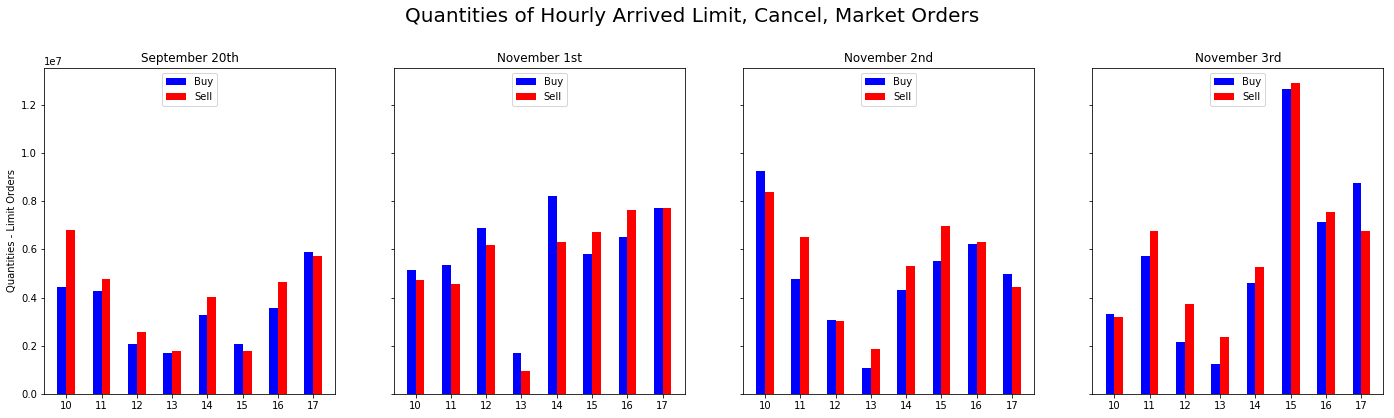

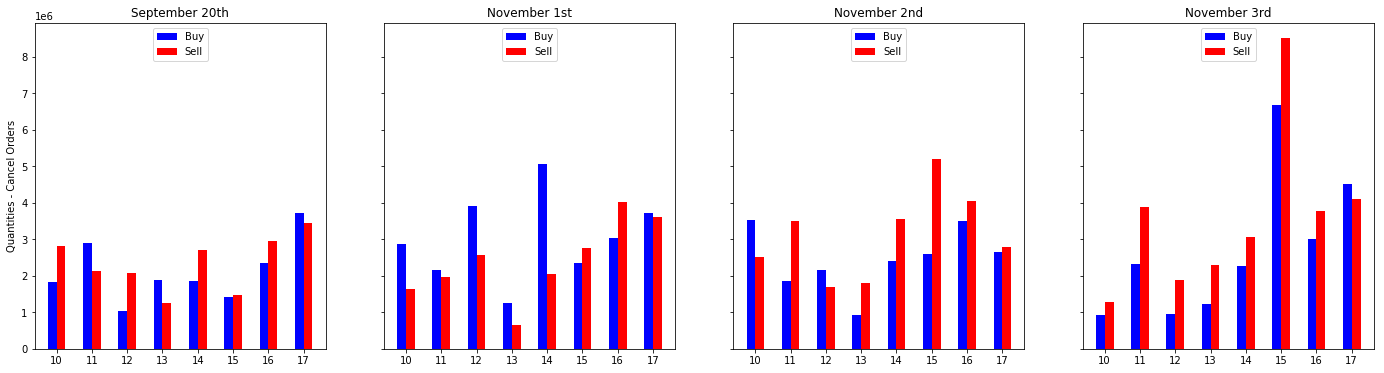

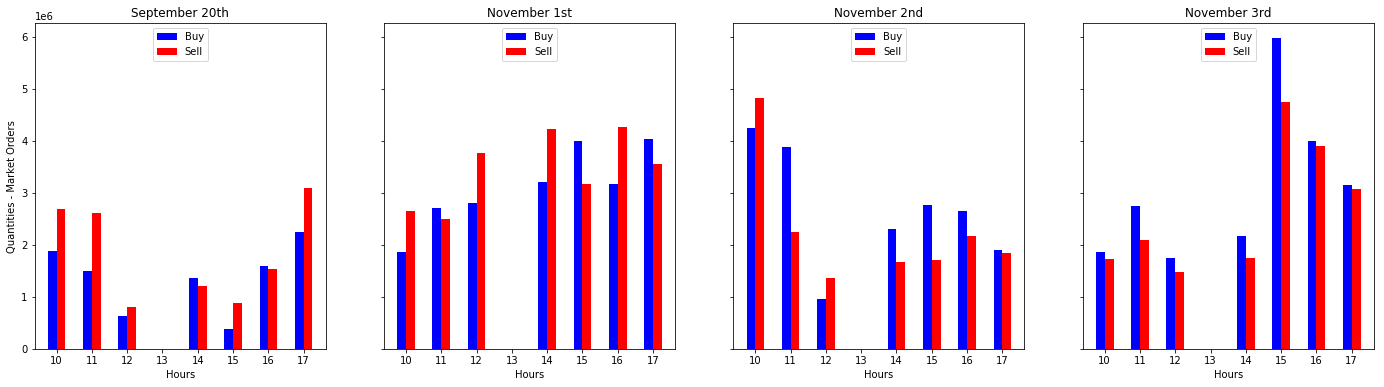

In [7]:
X = np.arange(10,18)
f, axes = plt.subplots(1, 4, sharey=True, figsize=(24,6))
f.suptitle("Quantities of Hourly Arrived Limit, Cancel, Market Orders", fontsize=20, y = 1.02)
j = 0
days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']

for i in range(0,7,2):
    axes[j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
    axes[j].bar(X - 0.125, limit_orders[i], color='b', width=0.25, label='Buy')
    axes[j].bar(X + 0.125, limit_orders[i+1], color='r', width=0.25, label='Sell')
    axes[j].legend(loc=9)
    axes[j].title.set_text(days[j])
    axes[0].set_ylabel("Quantities - Limit Orders")
    j += 1
    
f, axes = plt.subplots(1, 4, sharey=True, figsize=(24,6))
j = 0

for i in range(0,7,2):
    axes[j].bar(X - 0.125, cancel_orders[i], color='b', width=0.25, label='Buy')
    axes[j].bar(X + 0.125, cancel_orders[i+1], color='r', width=0.25, label='Sell')
    axes[j].legend(loc=9)
    axes[j].title.set_text(days[j])
    axes[0].set_ylabel("Quantities - Cancel Orders")
    axes[j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    j += 1
    
f, axes = plt.subplots(1, 4, sharey=True, figsize=(24,6))
j = 0

for i in range(0,7,2):
    axes[j].bar(X - 0.125, market_orders[i], color='b', width=0.25, label='Buy')
    axes[j].bar(X + 0.125, market_orders[i+1], color='r', width=0.25, label='Sell')
    axes[j].legend(loc=9)
    axes[j].title.set_text(days[j])
    axes[0].set_ylabel("Quantities - Market Orders")
    axes[j].set_xlabel("Hours")
    axes[j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    j += 1

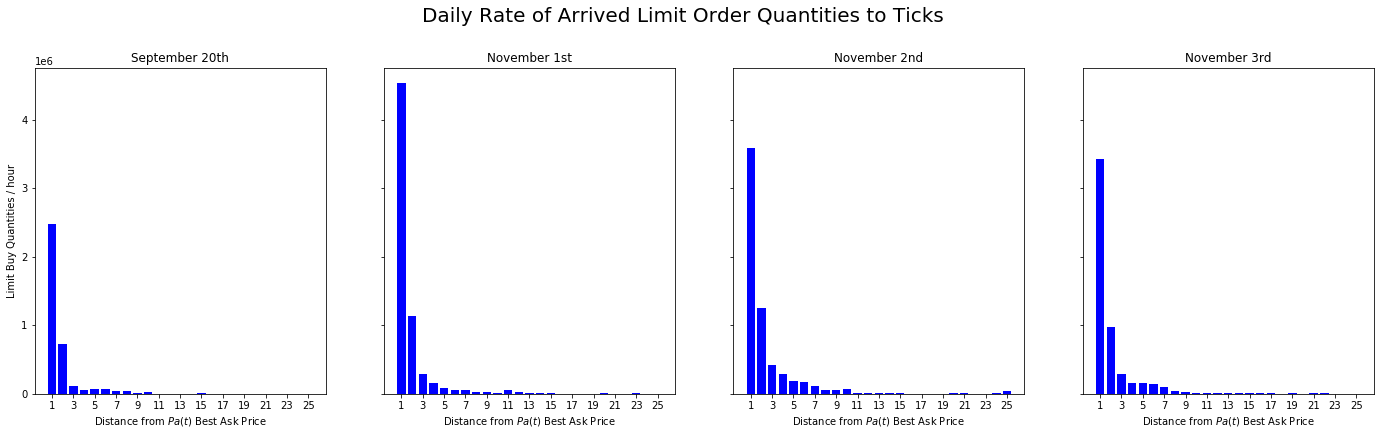

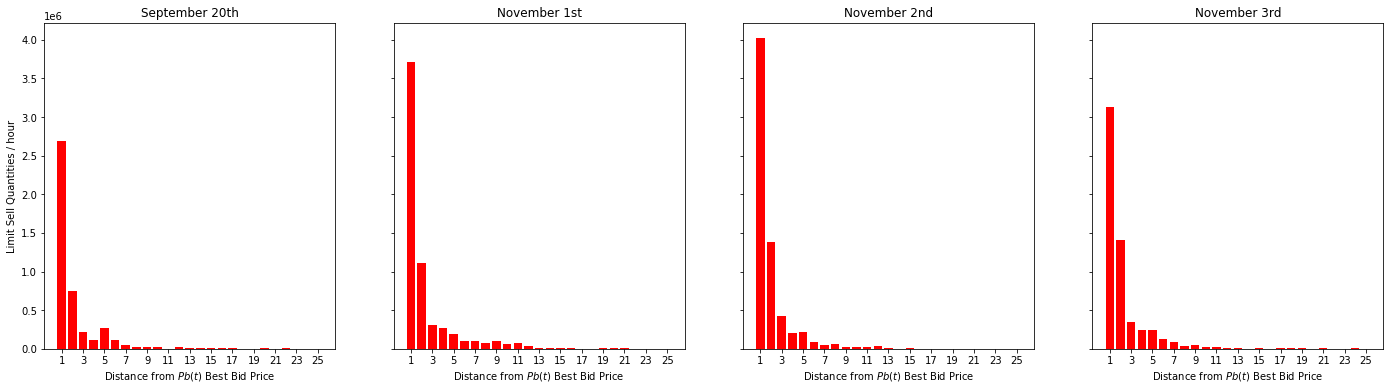

In [60]:
X = np.arange(1,26)
f, axes = plt.subplots(1, 4, sharey=True, figsize=(24,6))
f.suptitle('Daily Rate of Arrived Limit Order Quantities to Ticks', fontsize=20, y = 1.02)
j = 0
days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']

for i in range(0,7,2):
    axes[j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
    axes[j].bar(X, orders[j]['lambdasForLimitBuyOrder'][1:26], color='b')
    axes[j].title.set_text(days[j])
    axes[0].set_ylabel('Limit Buy Quantities / hour')
    axes[j].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
    axes[j].set_xticks(np.arange(1,26,2))
    j += 1 
    
f, axes = plt.subplots(1, 4, sharey=True, figsize=(24,6))
j = 0

for i in range(0,7,2):
    axes[j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
    axes[j].bar(X, orders[j]['lambdasForLimitSellOrder'][1:26], color='r')
    axes[j].title.set_text(days[j])
    axes[0].set_ylabel('Limit Sell Quantities / hour')
    axes[j].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
    axes[j].set_xticks(np.arange(1,26,2))
    j += 1 

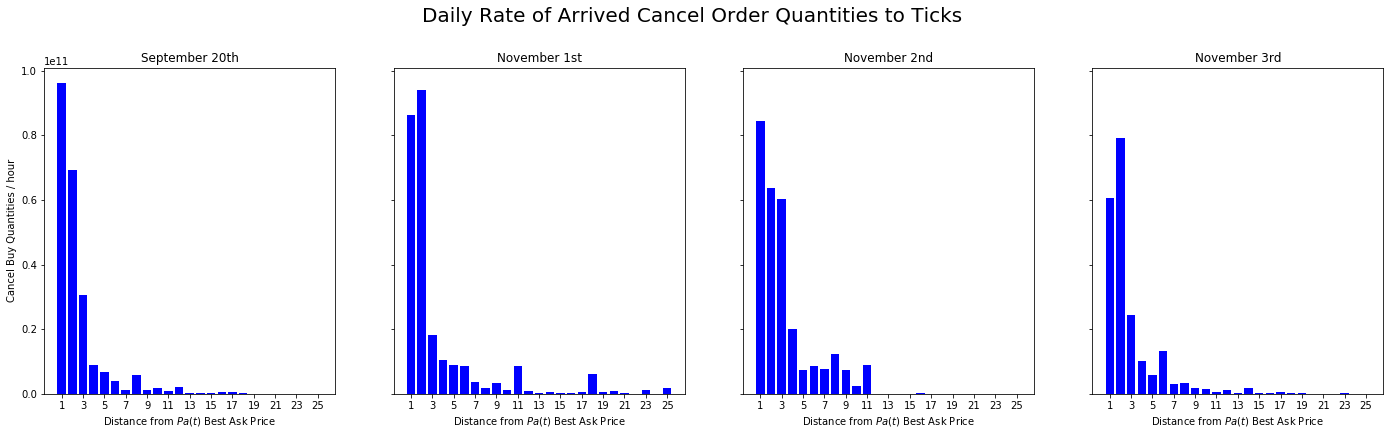

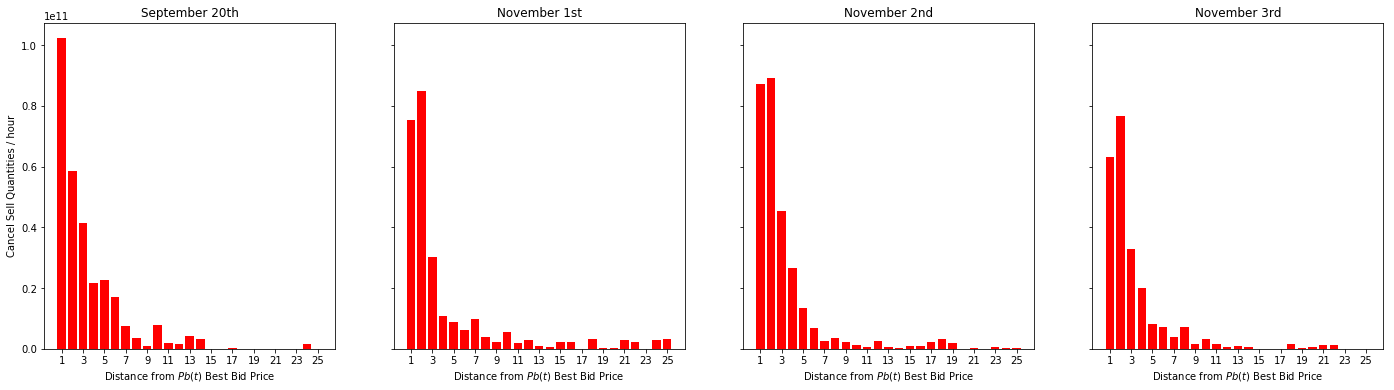

In [59]:
X = np.arange(1,26)
f, axes = plt.subplots(1, 4, sharey=True, figsize=(24,6))
f.suptitle('Daily Rate of Arrived Cancel Order Quantities to Ticks', fontsize=20, y = 1.02)
j = 0
days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']

for i in range(0,7,2):
    axes[j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
    axes[j].bar(X, orders[j]['thetasForBuyCancelOrder'][1:26], color='b')
    axes[j].title.set_text(days[j])
    axes[0].set_ylabel('Cancel Buy Quantities / hour')
    axes[j].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
    axes[j].set_xticks(np.arange(1,26,2))
    j += 1 
    
f, axes = plt.subplots(1, 4, sharey=True, figsize=(24,6))
j = 0

for i in range(0,7,2):
    axes[j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
    axes[j].bar(X, orders[j]['thetasForSellCancelOrder'][1:26], color='r')
    axes[j].title.set_text(days[j])
    axes[0].set_ylabel('Cancel Sell Quantities / hour')
    axes[j].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
    axes[j].set_xticks(np.arange(1,26,2))
    j += 1 

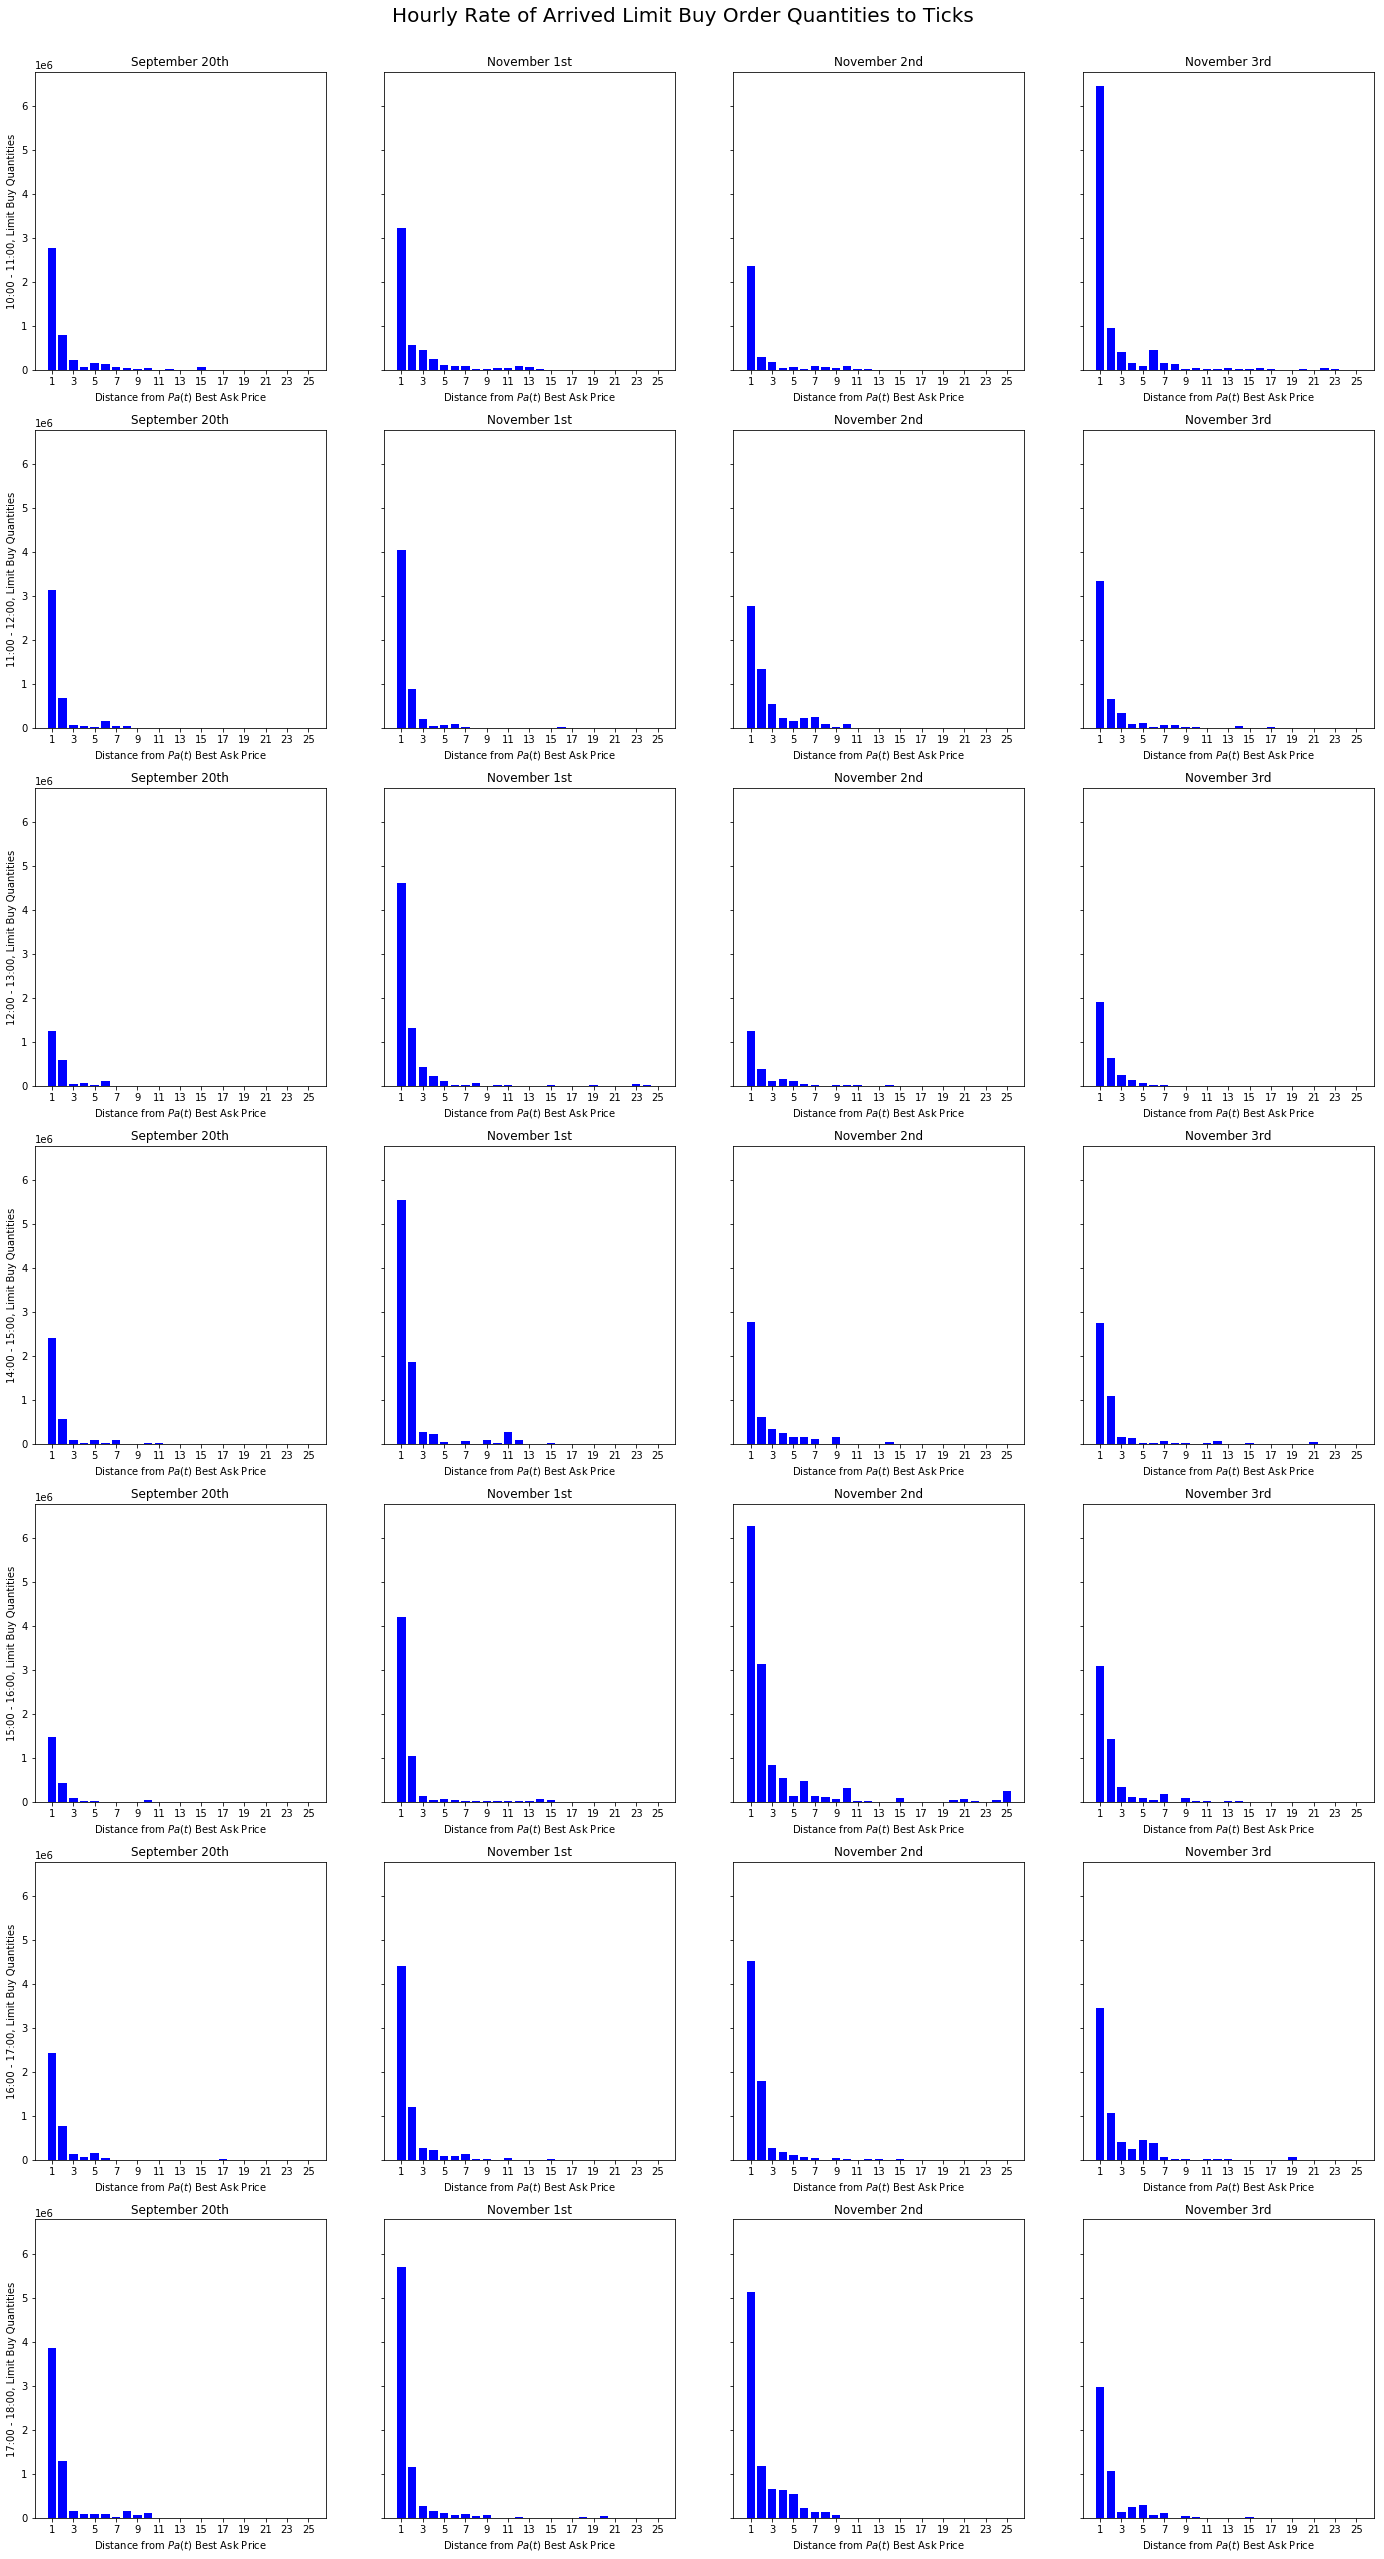

In [52]:
X = np.arange(1,26)
f, axes = plt.subplots(7, 4, sharey=True, figsize=(24,45))
f.suptitle('Hourly Rate of Arrived Limit Buy Order Quantities to Ticks', fontsize=20, y =.9)
days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']
hour_order = 1
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00',
        '17:00 - 18:00']

for i in range(7):
    j = 0
    for j in range(4):
        axes[i, j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
        axes[i, j].bar(X, orders[j]['lambdasForLimitBuyOrderHourly'][hour_order][1:26], color='b')
        axes[i, j].title.set_text(days[j])
        axes[i, 0].set_ylabel('{}, Limit Buy Quantities'.format(hours[i]))
        axes[i, j].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
        axes[i, j].set_xticks(np.arange(1,26,2))
        j += 1 
    hour_order += 1
    
    if hour_order == 4:
        hour_order += 1

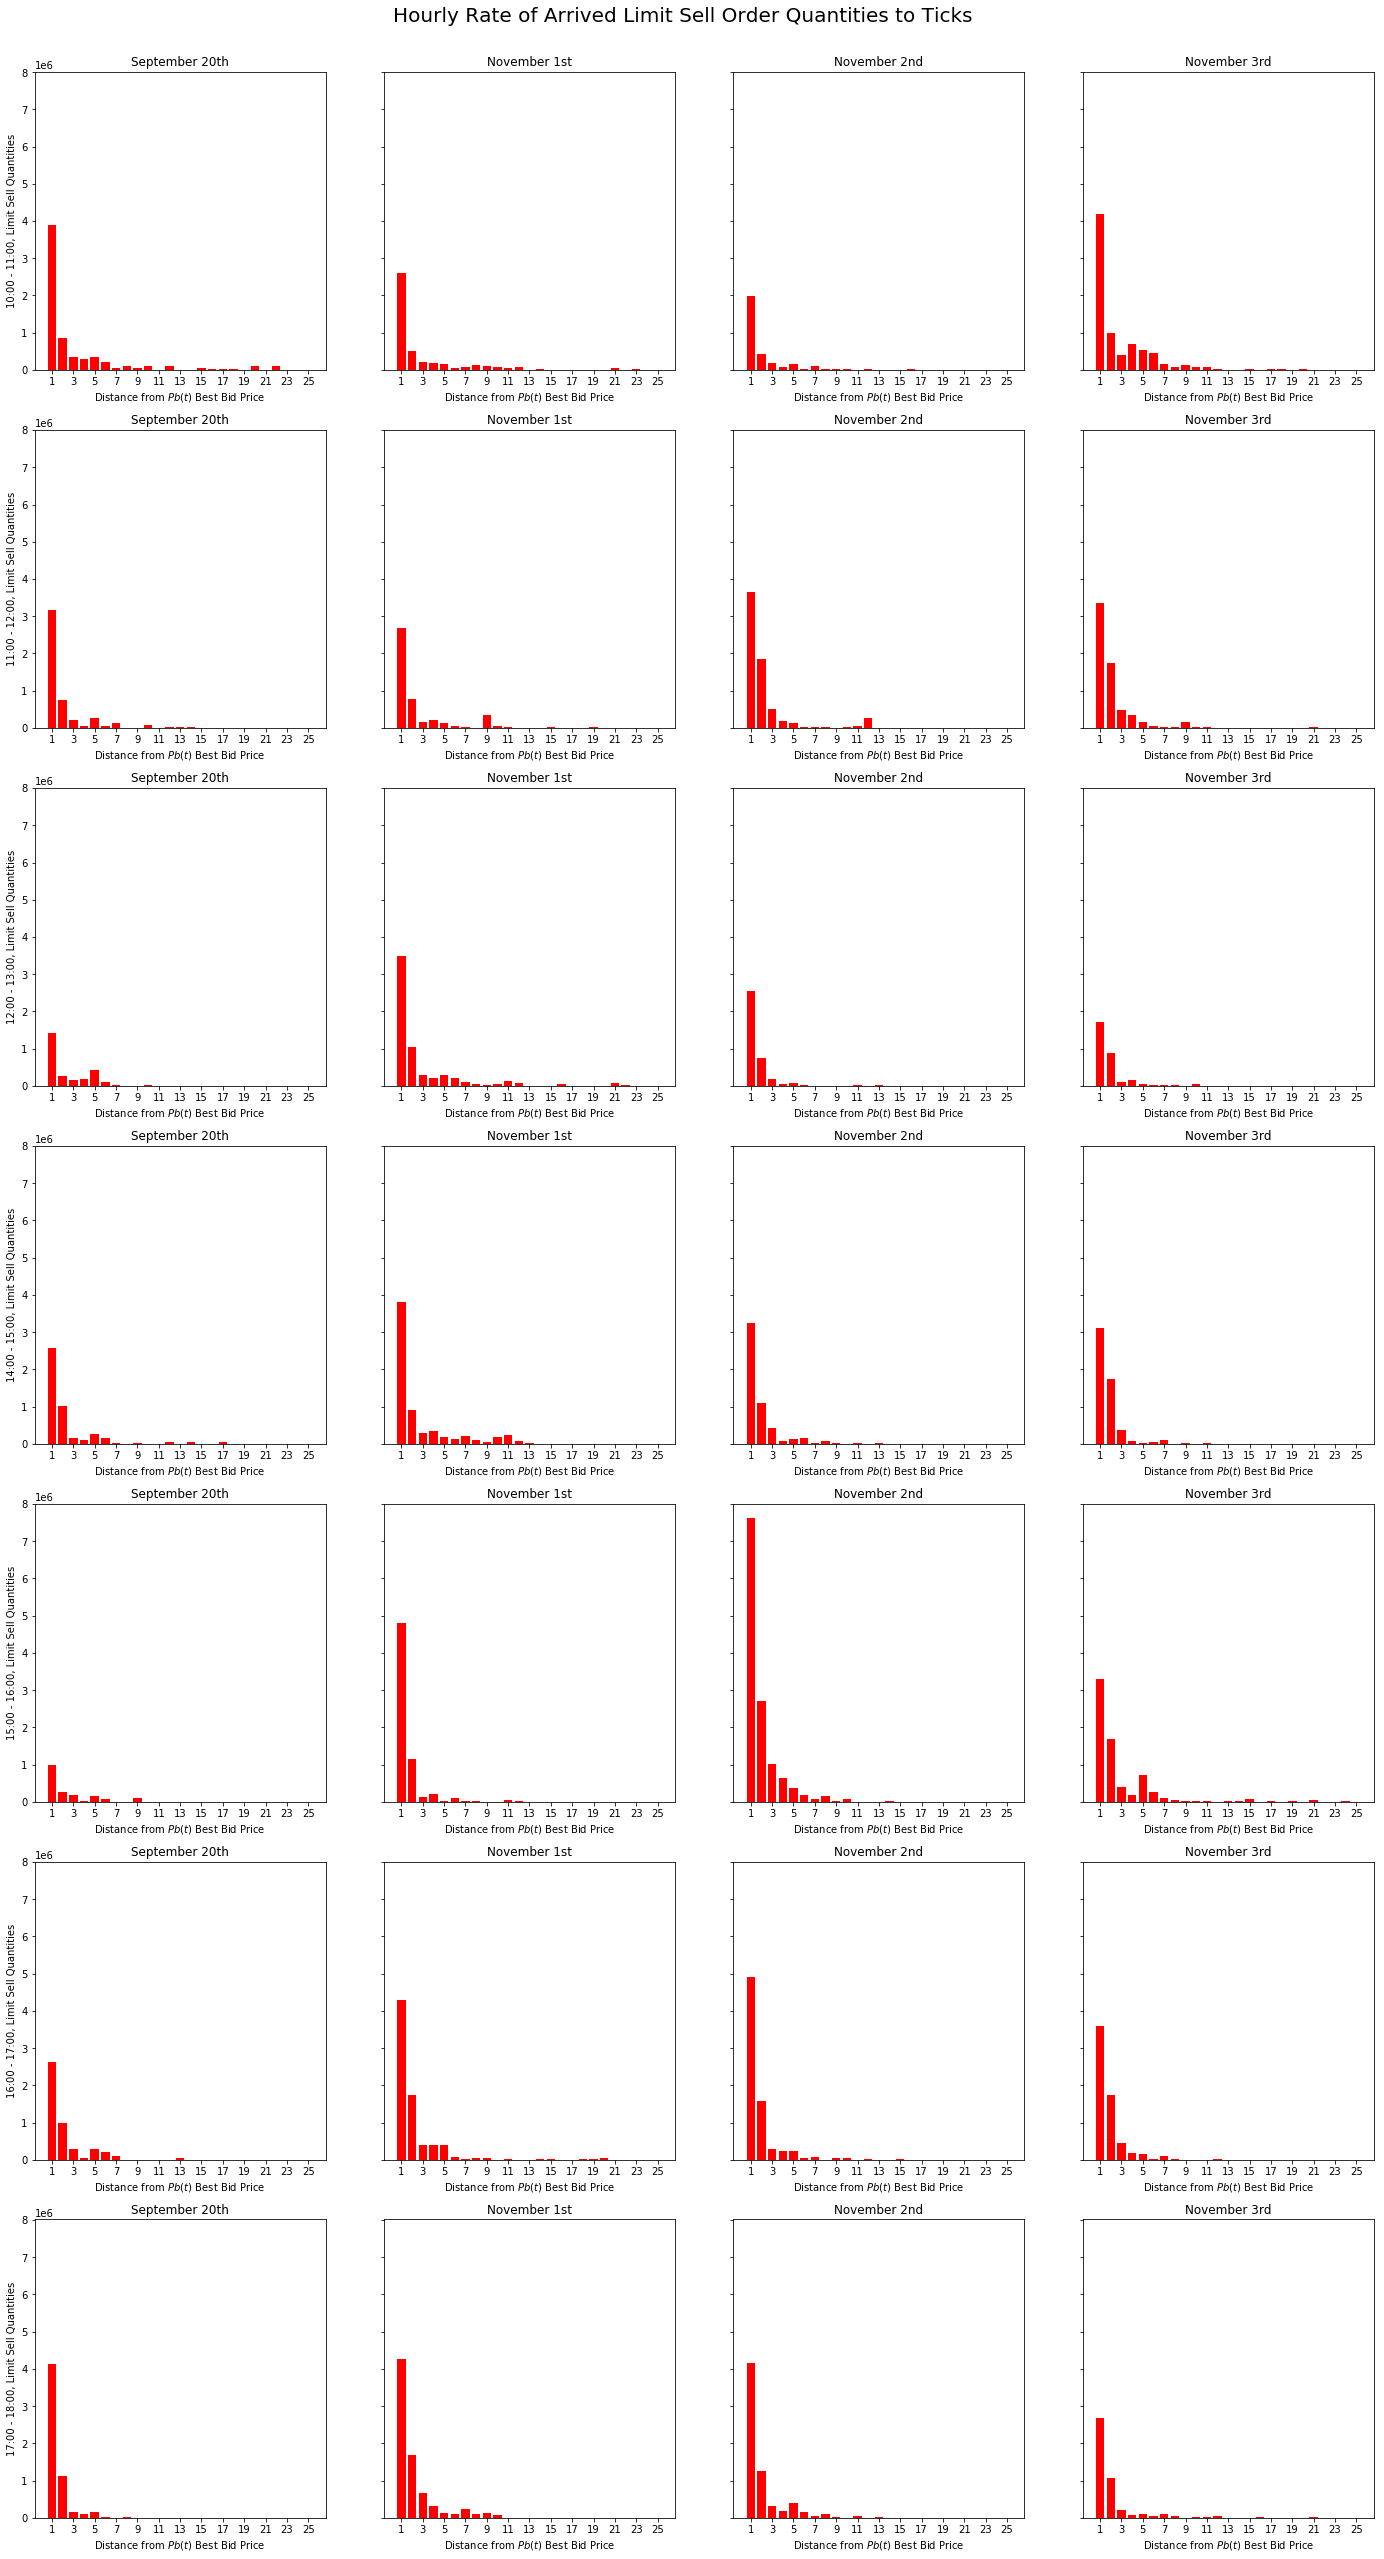

In [54]:
X = np.arange(1,26)
f, axes = plt.subplots(7, 4, sharey=True, figsize=(24,45))
f.suptitle('Hourly Rate of Arrived Limit Sell Order Quantities to Ticks', fontsize=20, y =.9)
days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']
hour_order = 1
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00',
        '17:00 - 18:00']

for i in range(7):
    j = 0
    for j in range(4):
        axes[i, j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
        axes[i, j].bar(X, orders[j]['lambdasForLimitSellOrderHourly'][hour_order][1:26], color='r')
        axes[i, j].title.set_text(days[j])
        axes[i, 0].set_ylabel('{}, Limit Sell Quantities'.format(hours[i]))
        axes[i, j].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
        axes[i, j].set_xticks(np.arange(1,26,2))
        j += 1 
    hour_order += 1
    
    if hour_order == 4:
        hour_order += 1

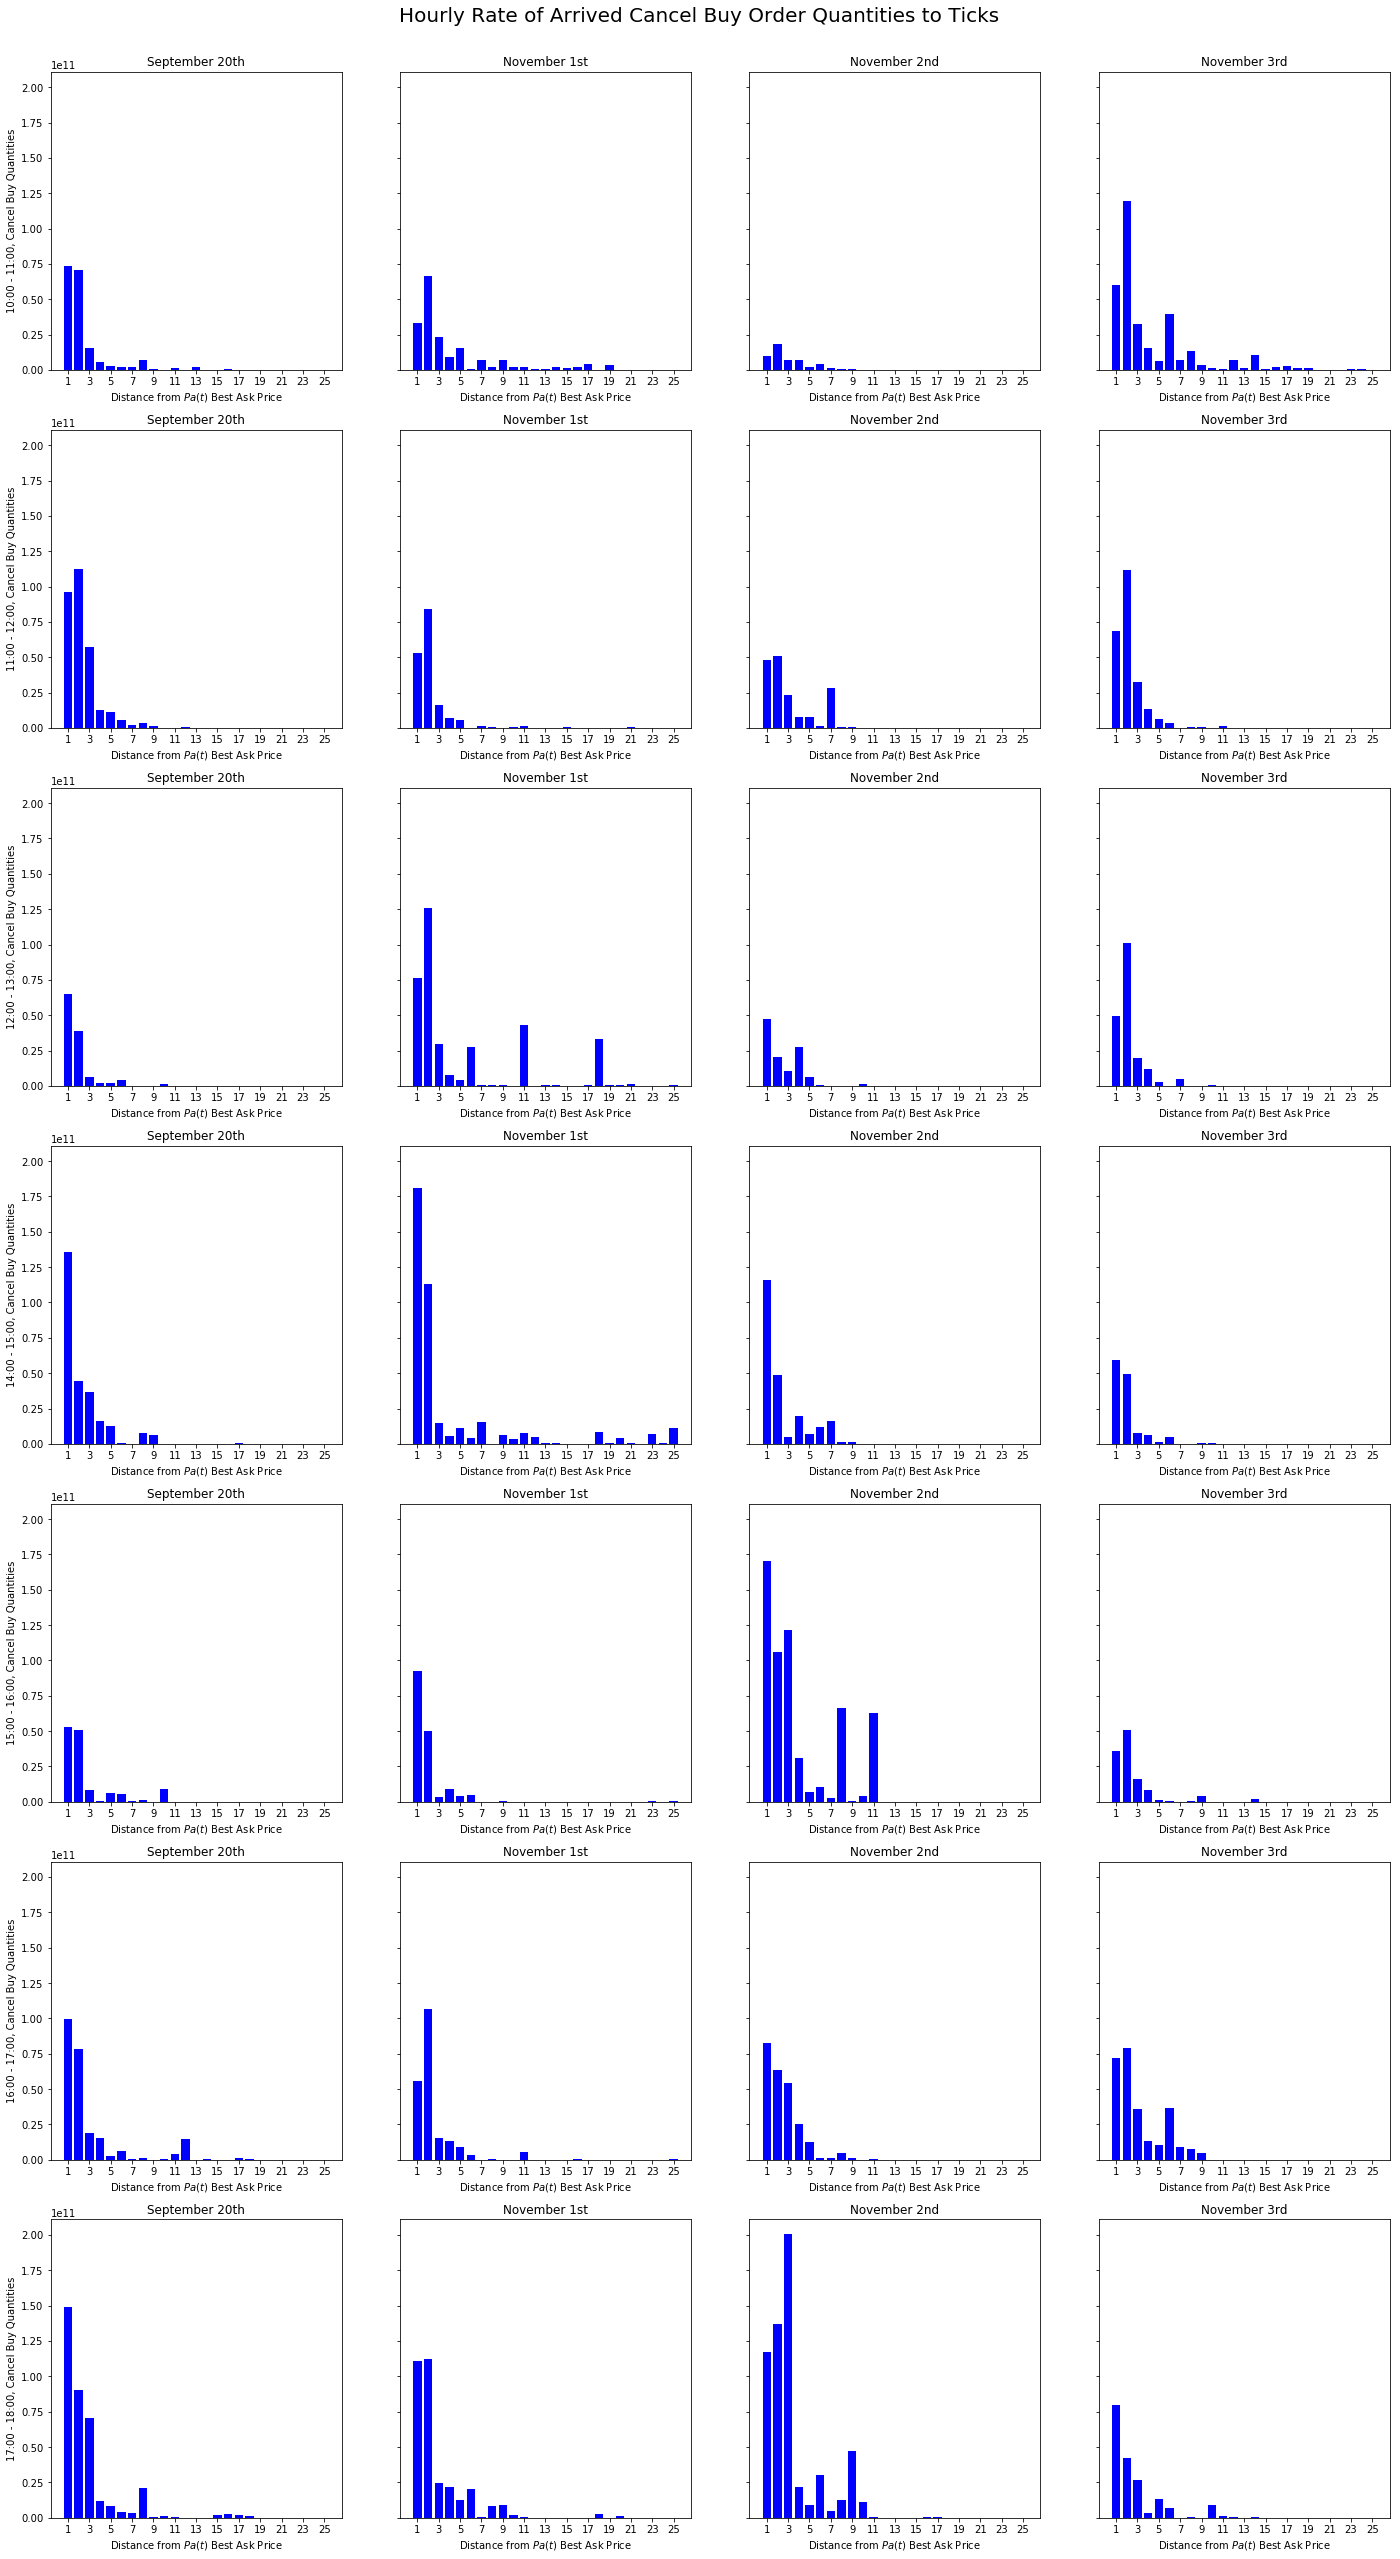

In [57]:
X = np.arange(1,26)
f, axes = plt.subplots(7, 4, sharey=True, figsize=(24,45))
f.suptitle('Hourly Rate of Arrived Cancel Buy Order Quantities to Ticks', fontsize=20, y =.9)
days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']
hour_order = 1
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00',
        '17:00 - 18:00']

for i in range(7):
    j = 0
    for j in range(4):
        axes[i, j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
        axes[i, j].bar(X, orders[j]['thetasForBuyCancelOrderHourly'][hour_order][1:26], color='b')
        axes[i, j].title.set_text(days[j])
        axes[i, 0].set_ylabel('{}, Cancel Buy Quantities'.format(hours[i]))
        axes[i, j].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
        axes[i, j].set_xticks(np.arange(1,26,2))
        j += 1 
    hour_order += 1
    
    if hour_order == 4:
        hour_order += 1

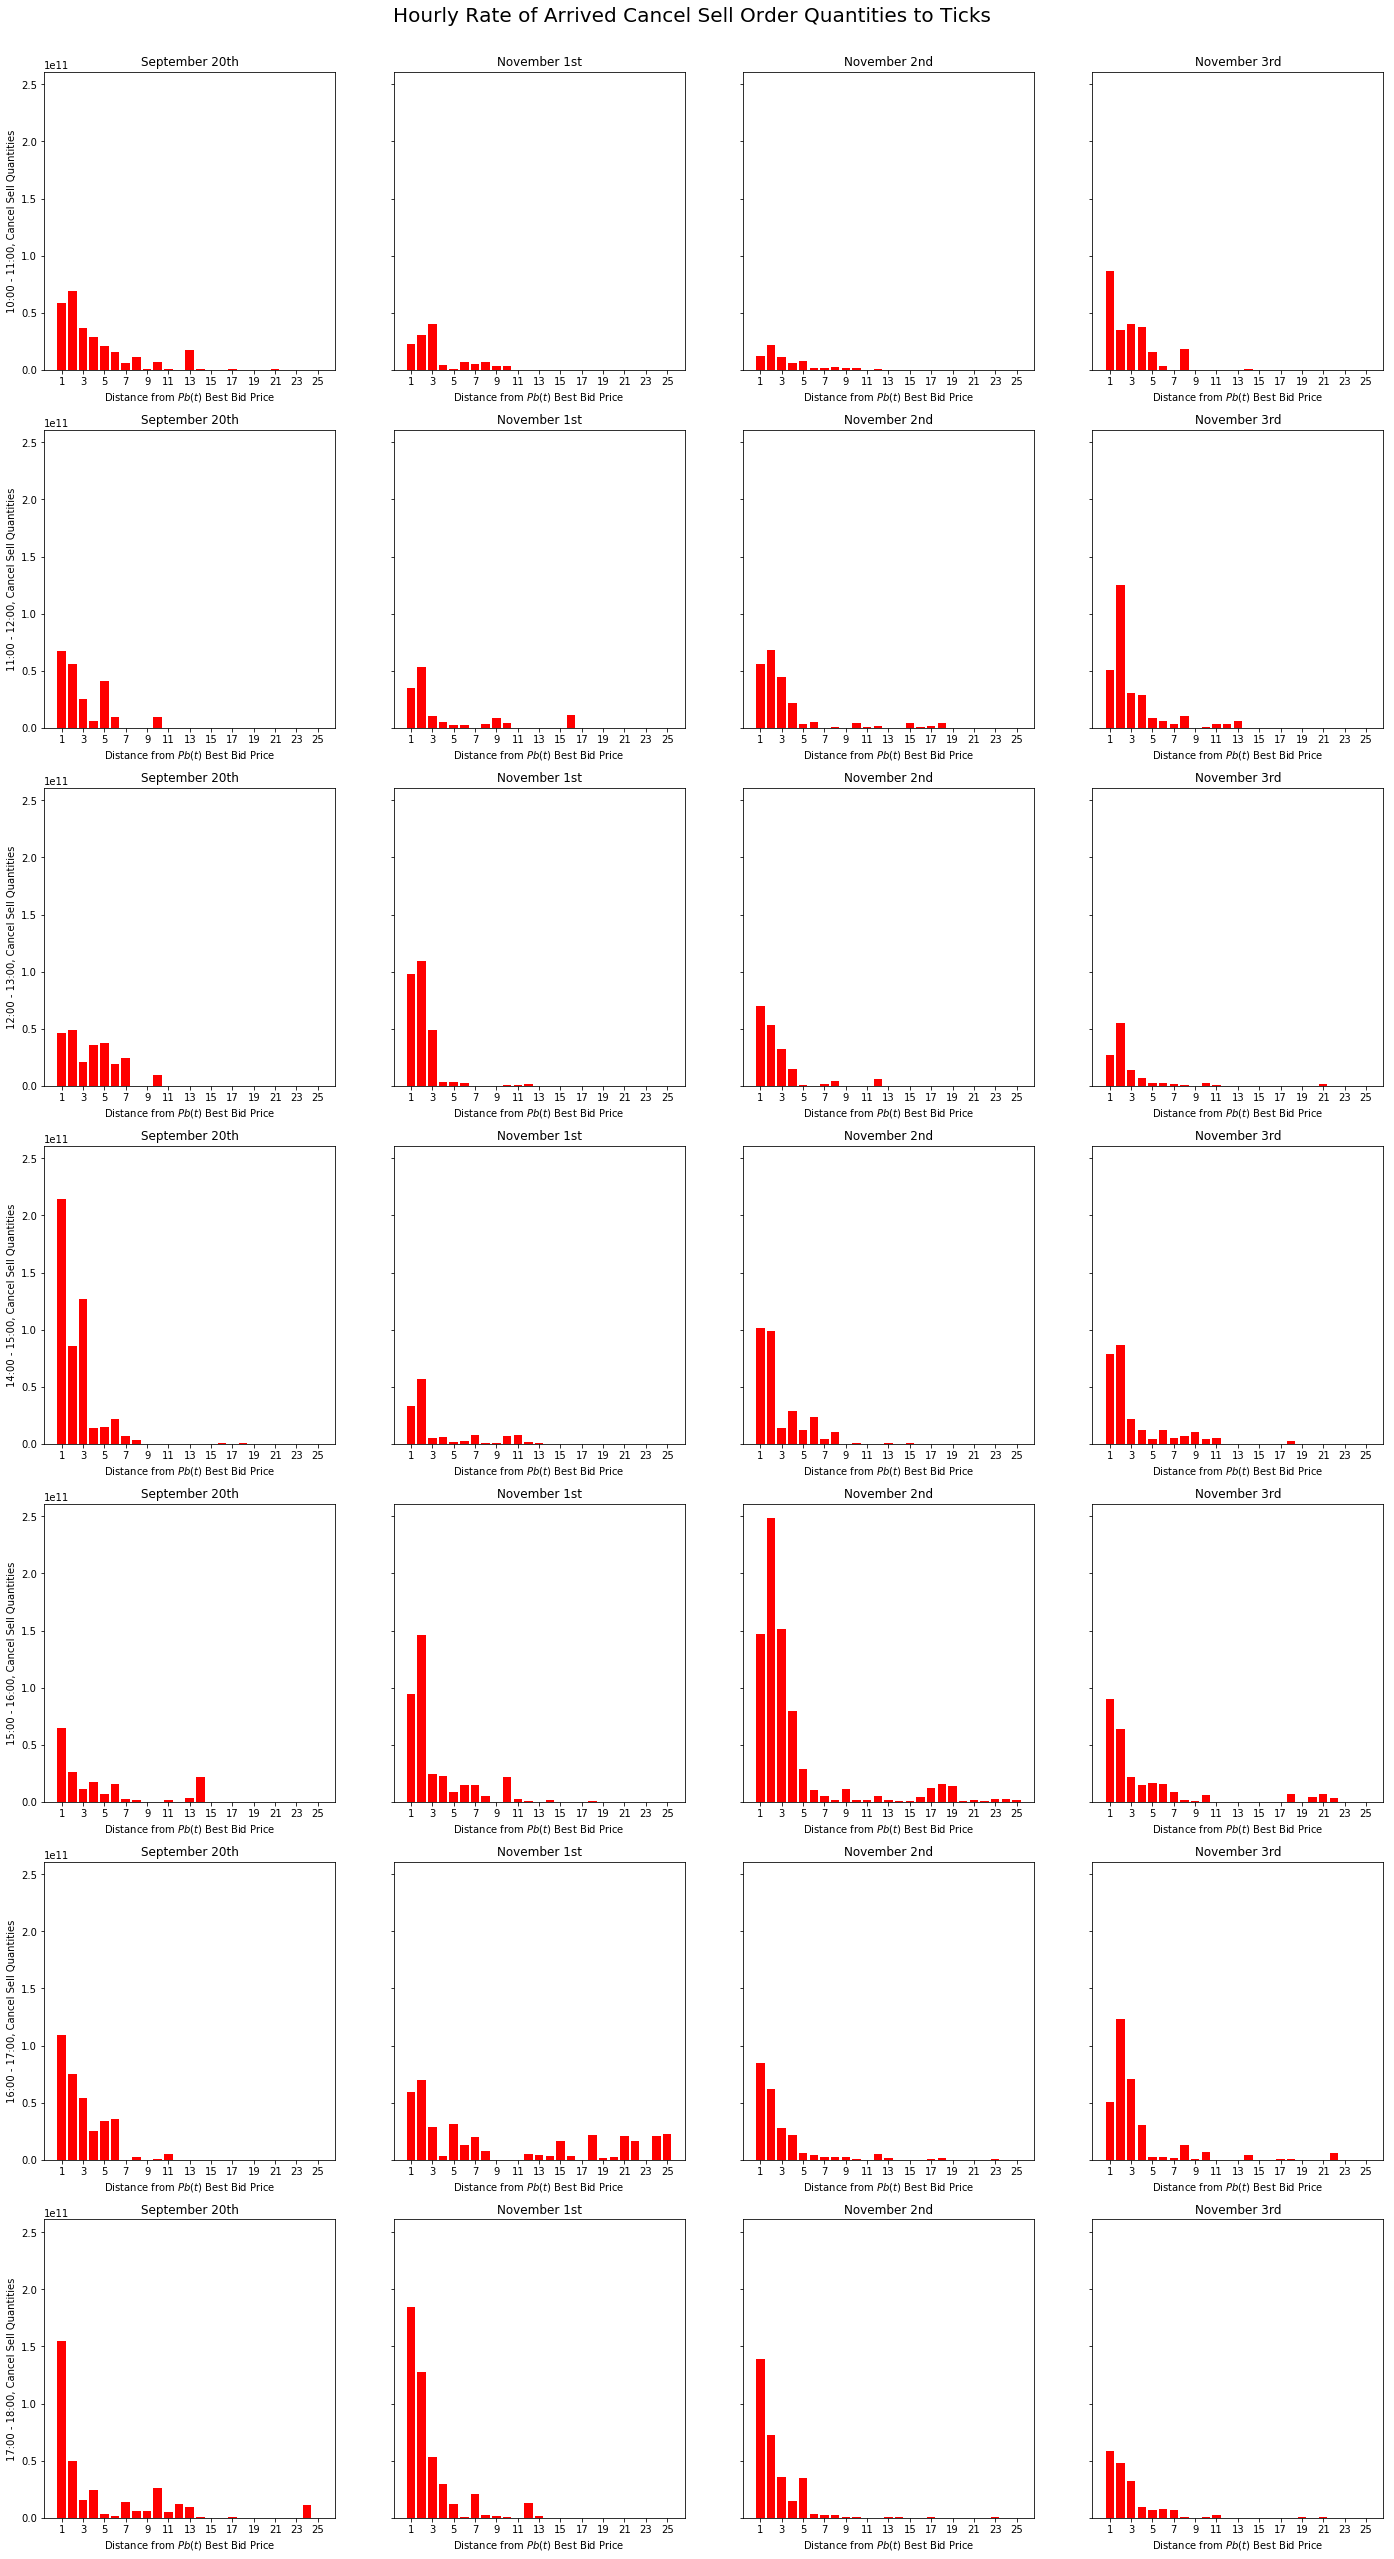

In [58]:
X = np.arange(1,26)
f, axes = plt.subplots(7, 4, sharey=True, figsize=(24,45))
f.suptitle('Hourly Rate of Arrived Cancel Sell Order Quantities to Ticks', fontsize=20, y =.9)
days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']
hour_order = 1
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00',
        '17:00 - 18:00']

for i in range(7):
    j = 0
    for j in range(4):
        axes[i, j].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
        axes[i, j].bar(X, orders[j]['thetasForSellCancelOrderHourly'][hour_order][1:26], color='r')
        axes[i, j].title.set_text(days[j])
        axes[i, 0].set_ylabel('{}, Cancel Sell Quantities'.format(hours[i]))
        axes[i, j].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
        axes[i, j].set_xticks(np.arange(1,26,2))
        j += 1 
    hour_order += 1
    
    if hour_order == 4:
        hour_order += 1